<a href="https://colab.research.google.com/github/jscienciadados/visualizacao-pandas/blob/main/TSE_Visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando Dados do TSE Eleiçoes Estaduais 2018 - Espirito Santo

In [6]:

import pandas as pd

sigla_uf = 'ES'

nome_arquivo = f'receitas_candidatos_2018_{sigla_uf}.csv'
url_arquivo = f'https://raw.githubusercontent.com/paulosalvatore/Ocean_CienciaDados_24_02_2021/main/receitas_candidatos/{nome_arquivo}'

df = pd.read_csv(url_arquivo, sep=';', encoding='latin-1', decimal=',')

In [7]:
df.head(3)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,SG_UF,SG_UE,NM_UE,NR_CNPJ_PRESTADOR_CONTA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NR_CPF_VICE_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,CD_FONTE_RECEITA,DS_FONTE_RECEITA,CD_ORIGEM_RECEITA,DS_ORIGEM_RECEITA,CD_NATUREZA_RECEITA,DS_NATUREZA_RECEITA,CD_ESPECIE_RECEITA,DS_ESPECIE_RECEITA,CD_CNAE_DOADOR,DS_CNAE_DOADOR,NR_CPF_CNPJ_DOADOR,NM_DOADOR,NM_DOADOR_RFB,CD_ESFERA_PARTIDARIA_DOADOR,DS_ESFERA_PARTIDARIA_DOADOR,SG_UF_DOADOR,CD_MUNICIPIO_DOADOR,NM_MUNICIPIO_DOADOR,SQ_CANDIDATO_DOADOR,NR_CANDIDATO_DOADOR,CD_CARGO_CANDIDATO_DOADOR,DS_CARGO_CANDIDATO_DOADOR,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA
0,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,28/10/2019,427245579,ES,ES,ESPÍRITO SANTO,31234606000115,7,Deputado Estadual,80000622506,12600,WALDREM MARCELO OLIVEIRA,7729957701,-1,12,PDT,Partido Democrático Trabalhista,1,Outros Recursos,10040000,Recursos de outros candidatos,0,Estimável,2,Estimado,94928,Atividades de organizações políticas,31236275000152,ELEIÇOES 2018 ANTONIO SERGIO ALVES VIDIGAL DEP...,ELEICAO 2018 ANTONIO SERGIO ALVES VIDIGAL DEPU...,#NULO#,#NULO#,ES,-1,#NULO#,80000622443,1212,6,Deputado Federal,12,PDT,Partido Democrático Trabalhista,#NULO#,#NULO#,12520046,03/10/2018,ADESIVO LEITOSO 20X40CM CASADO SERGIO/WALDREM,160.00
1,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,28/10/2019,427245579,ES,ES,ESPÍRITO SANTO,31234606000115,7,Deputado Estadual,80000622506,12600,WALDREM MARCELO OLIVEIRA,7729957701,-1,12,PDT,Partido Democrático Trabalhista,1,Outros Recursos,10040000,Recursos de outros candidatos,0,Estimável,2,Estimado,94928,Atividades de organizações políticas,31242334000103,ELEIÇÃO 2018 JOSE RENATO CASAGRANDE GOVERNADOR,ELEICAO 2018 JOSE RENATO CASAGRANDE GOVERNADOR,#NULO#,#NULO#,ES,-1,#NULO#,80000625512,40,3,Governador,40,PSB,Partido Socialista Brasileiro,126000700000ES000008E,#NULO#,12520044,01/10/2018,PRODUÇÃO DE PROGRAMA DE TV,88.23
2,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,28/10/2019,427245579,ES,ES,ESPÍRITO SANTO,31234606000115,7,Deputado Estadual,80000622506,12600,WALDREM MARCELO OLIVEIRA,7729957701,-1,12,PDT,Partido Democrático Trabalhista,2,Fundo Especial,10040000,Recursos de outros candidatos,0,Estimável,2,Estimado,94928,Atividades de organizações políticas,31242334000103,ELEIÇÃO 2018 JOSE RENATO CASAGRANDE GOVERNADOR,ELEICAO 2018 JOSE RENATO CASAGRANDE GOVERNADOR,#NULO#,#NULO#,ES,-1,#NULO#,80000625512,40,3,Governador,40,PSB,Partido Socialista Brasileiro,126000700000ES000006E,#NULO#,12520042,04/09/2018,SERVIÇOS ESPECIALIZADOS DE CRIAÇÃO DE MARCA· F...,507.61


In [8]:
colunas = ['SQ_CANDIDATO', 'NM_CANDIDATO', 'VR_RECEITA']
df_filtrado = df[colunas]

In [9]:
len(df_filtrado.SQ_CANDIDATO.unique())

735

In [10]:

len(df_filtrado.NM_CANDIDATO.unique())

735

In [11]:

group = df_filtrado.groupby(['SQ_CANDIDATO', 'NM_CANDIDATO'])

group.SQ_CANDIDATO.count()

SQ_CANDIDATO  NM_CANDIDATO                     
80000600183   ALEXANDRE MAGNO DE ANDRADE            8
80000600184   FABYANNA PONTINI MIRANDA PEREIRA      5
80000600185   ULISSES  PINCELLI                    16
80000600188   JADIR EDUARDO SOUZA LUCAS            11
80000600189   JOSE ANTONIO VERVLOET DO AMARAL      37
                                                   ..
80000629395   DANIELA MELLISSA DE MATOS QUEZADO     8
80000629494   LENILDA MARIA DA SILVA DESTEFANI     12
80000629597   MARIA RENATA DIAS DE SOUZA            6
80000629763   HUDSON DOS SANTOS                     5
80000629914   GLAUCIENE BASILIO DO CARMO            3
Name: SQ_CANDIDATO, Length: 735, dtype: int64

In [12]:

group_sum = group.VR_RECEITA.sum()

group_sum

SQ_CANDIDATO  NM_CANDIDATO                     
80000600183   ALEXANDRE MAGNO DE ANDRADE             5713.44
80000600184   FABYANNA PONTINI MIRANDA PEREIRA       1913.44
80000600185   ULISSES  PINCELLI                     15955.04
80000600188   JADIR EDUARDO SOUZA LUCAS              4818.44
80000600189   JOSE ANTONIO VERVLOET DO AMARAL       42499.04
                                                     ...    
80000629395   DANIELA MELLISSA DE MATOS QUEZADO      6153.53
80000629494   LENILDA MARIA DA SILVA DESTEFANI     256500.00
80000629597   MARIA RENATA DIAS DE SOUZA             1461.78
80000629763   HUDSON DOS SANTOS                     25103.81
80000629914   GLAUCIENE BASILIO DO CARMO             3820.00
Name: VR_RECEITA, Length: 735, dtype: float64

In [14]:

target = group_sum.nlargest(10)

target

SQ_CANDIDATO  NM_CANDIDATO                     
80000625512   JOSE RENATO CASAGRANDE               5129650.00
80000625509   RICARDO DE REZENDE FERRAÇO           2995299.00
80000607499   MAGNO PEREIRA MALTA                  2819275.60
80000612953   WELINGTON COIMBRA                    2389868.80
80000607498   LAURIETE RODRIGUES DE JESUS MALTA    2312720.00
80000612946   ROSILDA DE FREITAS                   1849480.00
80000627580   GUSTAVO PEIXOTO SOARES MIGUEL        1831142.20
80000622450   NORMA AYUB ALVES                     1688948.86
80000607497   GILSON DOS SANTOS LOPES FILHO        1548662.71
80000607518   AMARO ROCHA NASCIMENTO NETO          1451448.00
Name: VR_RECEITA, dtype: float64

In [17]:
import matplotlib.pyplot as plt

target_clared = target.reset_index('SQ_CANDIDATO', drop=True).sort_values(ascending=True)

target

SQ_CANDIDATO  NM_CANDIDATO                     
80000625512   JOSE RENATO CASAGRANDE               5129650.00
80000625509   RICARDO DE REZENDE FERRAÇO           2995299.00
80000607499   MAGNO PEREIRA MALTA                  2819275.60
80000612953   WELINGTON COIMBRA                    2389868.80
80000607498   LAURIETE RODRIGUES DE JESUS MALTA    2312720.00
80000612946   ROSILDA DE FREITAS                   1849480.00
80000627580   GUSTAVO PEIXOTO SOARES MIGUEL        1831142.20
80000622450   NORMA AYUB ALVES                     1688948.86
80000607497   GILSON DOS SANTOS LOPES FILHO        1548662.71
80000607518   AMARO ROCHA NASCIMENTO NETO          1451448.00
Name: VR_RECEITA, dtype: float64

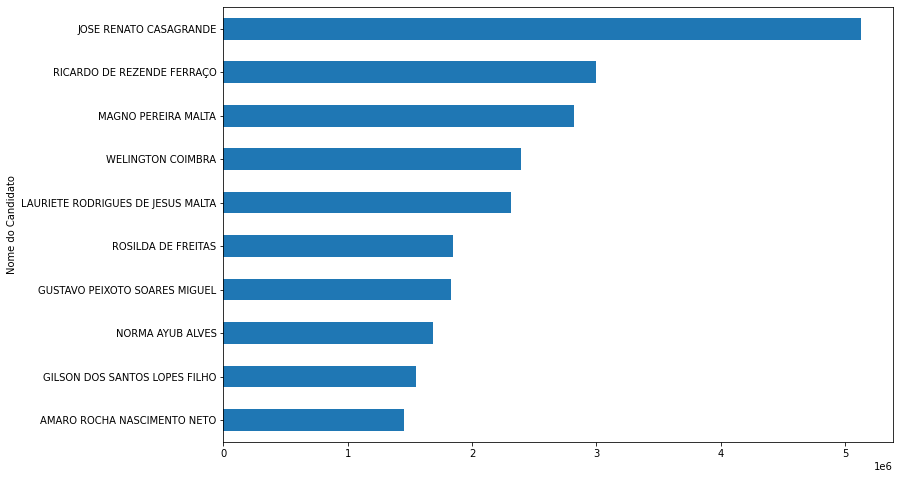

In [21]:
plt.figure(figsize=(12,8))
grah = target_clared.plot.barh()
grah.set_ylabel('Nome do Candidato');

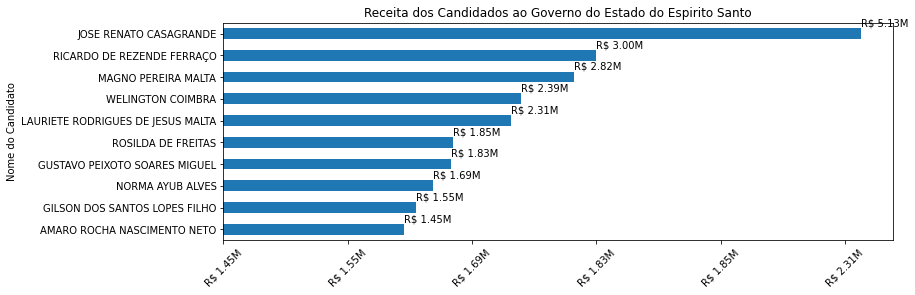

In [30]:
def formatar_valor(valor):
  return f'R$ {valor / 1000000:.2f}M'


import matplotlib.pyplot as plt

target_cleared = target.reset_index('SQ_CANDIDATO', drop=True).sort_values(ascending=True)

target_formatado = target_cleared.map(formatar_valor)

fig = plt.figure(figsize=(12, 4))
graph = target_cleared.plot.barh(figure=fig)

graph.set_ylabel('Nome do Candidato')
graph.set_xticklabels(target_formatado.values, rotation=45)

x_offset = 0
y_offset = 0.1

for index, rectangle in enumerate(graph.patches):
  box = rectangle.get_bbox()

  vr_receita = target_formatado.values[index]
  
  graph.annotate(vr_receita, ((box.x0 + box.x1) + x_offset, box.y1 + y_offset))

plt.locator_params(nbins=10)
plt.title('Receita dos Candidados ao Governo do Estado do Espirito Santo')
plt.show()